Метод: есть сетка с $x_i, i=0,...,N$ и $f(x_i), i=0,...,N$. Хотим на каждом отрезке разбиения $[x_{i-1}, x_i], i=1,...,N$ приблизить функцию $f$ кубическим многочленом $S_i(x)=a_i+b_i(x-x_{i-1})+c_i(x-x_{i-1})^2+d_i(x-x_{i-1})^3$. На коэффиценты $c_i, i=2,...,N$ составляется трёхдиагональная система, которая решается методом прогонки (Томаса). $c_1=0$, а остальные коэффиценты выражаются через найденные $c_i$, данные $f(x_i)$ и $h_i=x_i-x_{i-1}, i=1,...,N$.

### Реализация

In [36]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline(xgrid, fgrid):
    x = np.array(xgrid)
    f = np.array(fgrid)
    N = x.shape[0] - 1
    a = np.zeros(N + 1)
    a[1:] = f[:N]
    b = np.zeros(N + 1)
    c = np.zeros(N + 1)
    d = np.zeros(N + 1)
    h = np.zeros(N + 1)
    h[1:] = x[1:] - x[:N]
    p = np.zeros(N)
    q = np.zeros(N)
    F = np.zeros(N)
    F[1:] = 3 * (((f[2:] - f[1:N]) / h[2:]) - ((f[1:N] - f[:N - 1]) / h[1:N]))
    p[2] = -h[2] / (2 * (h[1] + h[2]))
    q[2] = F[1] / (2 * (h[1] + h[2]))
    
    # Метод прогонки
    # Вычисление коэффицентов прогонки:
    for i in range(2, N - 1):
        p[i + 1] = -h[i + 1] / (h[i] * p[i] + 2 * (h[i] + h[i + 1]))
        q[i + 1] = (F[i] - h[i] * q[i]) / (h[i] * p[i] + 2 * (h[i] + h[i + 1]))
    
    # Вычисление решения системы:
    c[N] = (F[N - 1] - h[N - 1] * q[N - 1]) / (2 * (h[N - 1] + h[N]) + h[N - 1] * p[N - 1])
    for i in range(N - 1, 1, -1):
        c[i] = p[i] * c[i + 1] + q[i]
        
    # Вычисление коэффицентов b, d:
    b[N] = ((f[N] - f[N - 1]) / h[N]) - 2 * h[N] * c[N] / 3
    d[N] = -c[N] / (3 * h[N])
    for i in range(1, N):
        b[i] = ((f[i] - f[i - 1]) / h[i]) - (h[i] * (c[i + 1] + 2 * c[i])) / 3
        d[i] = (c[i + 1] - c[i]) / (3 * h[i])
    return a, b, c, d


def interpolated_func(arg, xgrid, a, b, c, d):
    x = np.array(xgrid)
    for i in range(1, x.shape[0]):
        if arg <= x[i]:
            return a[i] + b[i] * (arg - x[i - 1]) + c[i] * (arg - x[i - 1])**2 + d[i] * (arg - x[i - 1])**3

Populating the interactive namespace from numpy and matplotlib


### Эксперименты

#### Гладкая $f(x)=x^2$

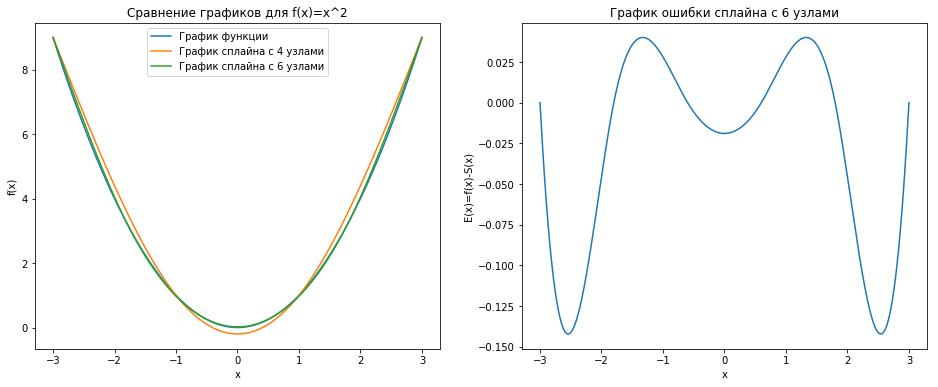

In [37]:
xgrid1 = np.linspace(-3, 3, 4)
fgrid1 = xgrid1**2
xgrid2 = np.linspace(-3, 3, 6)
fgrid2 = xgrid2**2
xgrid = np.linspace(-3, 3, 10000)
spline1 = np.empty(xgrid.shape[0])
spline2 = np.empty(xgrid.shape[0])
a1, b1, c1, d1 = cubic_spline(xgrid1, fgrid1)
a2, b2, c2, d2 = cubic_spline(xgrid2, fgrid2)
for i in range(xgrid.shape[0]):
    spline1[i] = interpolated_func(xgrid[i], xgrid1, a1, b1, c1, d1)
    spline2[i] = interpolated_func(xgrid[i], xgrid2, a2, b2, c2, d2)
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(xgrid, xgrid**2, label='График функции')
plt.plot(xgrid, spline1, label='График сплайна с 4 узлами')
plt.plot(xgrid, spline2, label='График сплайна с 6 узлами')
plt.title('Сравнение графиков для f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.subplot(122)
plt.plot(xgrid, xgrid**2 - spline2)
plt.title('График ошибки сплайна с 6 узлами')
plt.xlabel('x')
plt.ylabel('E(x)=f(x)-S(x)')
plt.show()

**Видно, что для гладкой функции достаточно даже 6 узлов для очень хорошего приближения.**

#### Осциллирующая $f(x)=sin(100x)$

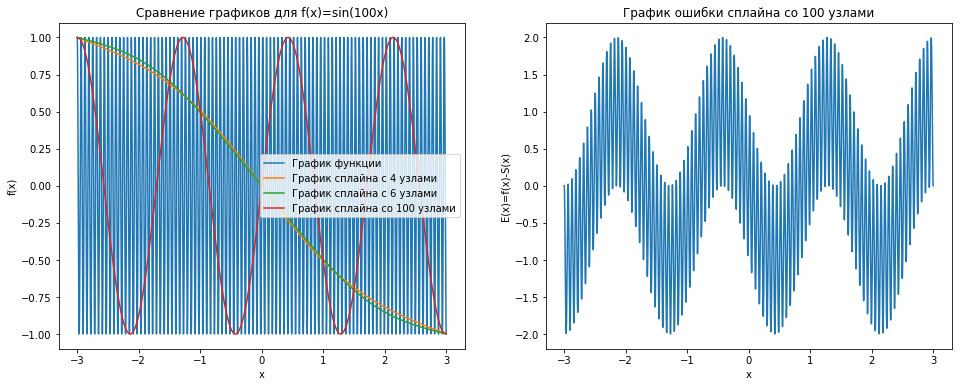

In [38]:
xgrid1 = np.linspace(-3, 3, 4)
fgrid1 = np.sin(xgrid1 * 100)
xgrid2 = np.linspace(-3, 3, 6)
fgrid2 = np.sin(xgrid2 * 100)
xgrid3 = np.linspace(-3, 3, 100)
fgrid3 = np.sin(xgrid3 * 100)
xgrid = np.linspace(-3, 3, 10000)
spline1 = np.empty(xgrid.shape[0])
spline2 = np.empty(xgrid.shape[0])
spline3 = np.empty(xgrid.shape[0])
a1, b1, c1, d1 = cubic_spline(xgrid1, fgrid1)
a2, b2, c2, d2 = cubic_spline(xgrid2, fgrid2)
a3, b3, c3, d3 = cubic_spline(xgrid3, fgrid3)
for i in range(xgrid.shape[0]):
    spline1[i] = interpolated_func(xgrid[i], xgrid1, a1, b1, c1, d1)
    spline2[i] = interpolated_func(xgrid[i], xgrid2, a2, b2, c2, d2)
    spline3[i] = interpolated_func(xgrid[i], xgrid3, a3, b3, c3, d3)
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(xgrid, np.sin(xgrid * 100), label='График функции')
plt.plot(xgrid, spline1, label='График сплайна с 4 узлами')
plt.plot(xgrid, spline2, label='График сплайна с 6 узлами')
plt.plot(xgrid, spline3, label='График сплайна со 100 узлами')
plt.title('Сравнение графиков для f(x)=sin(100x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.subplot(122)
plt.plot(xgrid, np.sin(xgrid * 100) - spline3)
plt.title('График ошибки сплайна со 100 узлами')
plt.xlabel('x')
plt.ylabel('E(x)=f(x)-S(x)')
plt.show()

**А вот для такой осциллирующей функции сплайны получаются намного хуже, требуется намного больше узлов, и даже 100 не хватает для хорошего приближения.**

#### Разрывная $f(x)=x^2, x < 0; f(x)=x+3, x \geqslant 0$

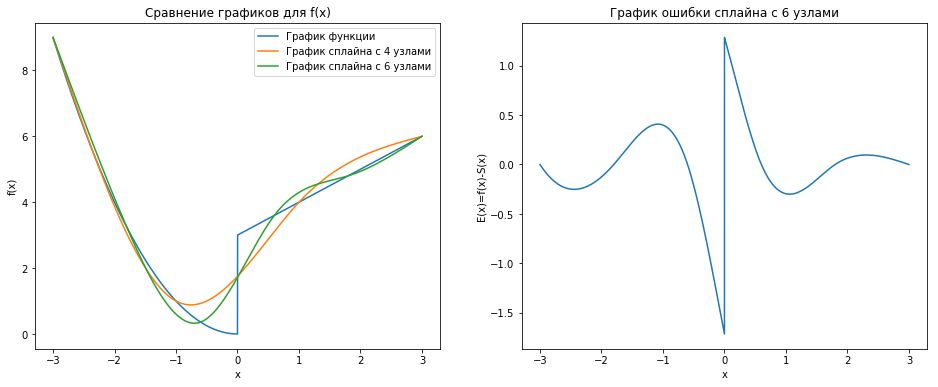

In [39]:
xgrid1 = np.linspace(-3, 3, 4)
fgrid1 = np.empty(xgrid1.shape[0])
fgrid1[xgrid1 < 0] = xgrid1[xgrid1 < 0]**2
fgrid1[xgrid1 >= 0] = xgrid1[xgrid1 >= 0] + 3
xgrid2 = np.linspace(-3, 3, 6)
fgrid2 = np.empty(xgrid2.shape[0])
fgrid2[xgrid2 < 0] = xgrid2[xgrid2 < 0]**2
fgrid2[xgrid2 >= 0] = xgrid2[xgrid2 >= 0] + 3
#xgrid3 = np.linspace(-3, 3, 10)
#fgrid3 = np.empty(xgrid3.shape[0])
#fgrid3[xgrid3 < 0] = xgrid3[xgrid3 < 0]**2
#fgrid3[xgrid3 >= 0] = xgrid3[xgrid3 >= 0] + 3
xgrid = np.linspace(-3, 3, 10000)
fgrid = np.empty(xgrid.shape[0])
fgrid[xgrid < 0] = xgrid[xgrid < 0]**2
fgrid[xgrid >= 0] = xgrid[xgrid >= 0] + 3
spline1 = np.empty(xgrid.shape[0])
spline2 = np.empty(xgrid.shape[0])
#spline3 = np.empty(xgrid.shape[0])
a1, b1, c1, d1 = cubic_spline(xgrid1, fgrid1)
a2, b2, c2, d2 = cubic_spline(xgrid2, fgrid2)
#a3, b3, c3, d3 = cubic_spline(xgrid3, fgrid3)
for i in range(xgrid.shape[0]):
    spline1[i] = interpolated_func(xgrid[i], xgrid1, a1, b1, c1, d1)
    spline2[i] = interpolated_func(xgrid[i], xgrid2, a2, b2, c2, d2)
#    spline3[i] = interpolated_func(xgrid[i], xgrid3, a3, b3, c3, d3)
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(xgrid, fgrid, label='График функции')
plt.plot(xgrid, spline1, label='График сплайна с 4 узлами')
plt.plot(xgrid, spline2, label='График сплайна с 6 узлами')
#plt.plot(xgrid, spline3, label='График сплайна со 10 узлами')
plt.title('Сравнение графиков для f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.subplot(122)
plt.plot(xgrid, fgrid - spline2)
plt.title('График ошибки сплайна с 6 узлами')
plt.xlabel('x')
plt.ylabel('E(x)=f(x)-S(x)')
plt.show()

**Для разрывной всё тоже не так хорошо, как для гладкой, но намного лучше чем с осциллирующей. Видно, что 6 узлов тоже неплохо приближают функцию, хотя в точке разрыва наблюдается сравнительно большое отклонение. До приближения как у гладкой далеко, требуется больше узлов чтобы исправить ситуацию в точке разрыва.**